# Recommendation Systems

* The popular e-commerce websites like Amazon , Flipkart etc need to recommend the right product in order to get maximum user purchases. They try to cross sell and up sell itmes to maximize their revenue

* Recommendation is important because the number of products / comtent etc on platforms is way too many. A user can only see around 20-30 of those items so recommending the correct set of items is important.

There are two types of Collaborating Filtering :-

* Item to item Collaborating Filtering
* User Based Collaborating Filtering


 - In both methods Cosine Similarities are found b/t vectors. If they are close to 0 then it means that they are not similar. If they are close to 1 then it means that they are similar.

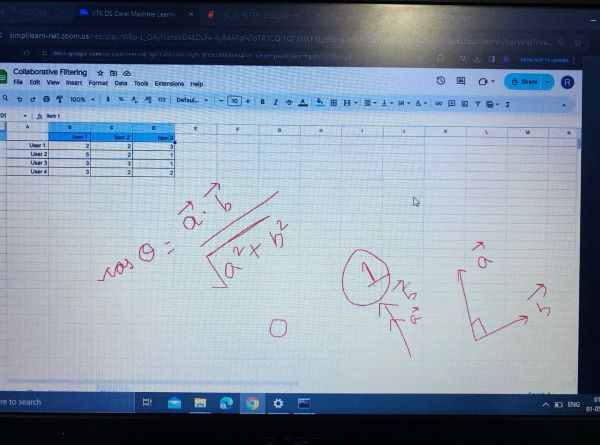

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
data = {'User' : ['User 1', 'User 2', 'User 3', 'User 4'],
        'Movie 1' : [2,5,3,3],
        'Movie 2' :[2,2,3,2],
        'Movie 3' :[3,1,1,2],
        'Movie 4' :[2,3,4,5], # 4&5 later added
        'Movie 5' :[4,5,5,1]
       }

In [45]:
type(data)

dict

In [46]:
data

{'User': ['User 1', 'User 2', 'User 3', 'User 4'],
 'Movie 1': [2, 5, 3, 3],
 'Movie 2': [2, 2, 3, 2],
 'Movie 3': [3, 1, 1, 2],
 'Movie 4': [2, 3, 4, 5],
 'Movie 5': [4, 5, 5, 1]}

In [47]:
df = pd.DataFrame(data)

In [48]:
type(df)

pandas.core.frame.DataFrame

In [49]:
df

,User,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
0,User 1,2,2,3,2,4
1,User 2,5,2,1,3,5
2,User 3,3,3,1,4,5
3,User 4,3,2,2,5,1


In [50]:
df.drop('User',axis=1)

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
0,2,2,3,2,4
1,5,2,1,3,5
2,3,3,1,4,5
3,3,2,2,5,1


In [51]:
cosine_similarity(df.drop('User',axis=1).T)

array([[1.        , 0.92308017, 0.75324358, 0.91308671, 0.90883249],
       [0.92308017, 1.        , 0.84515425, 0.95026219, 0.93308454],
       [0.75324358, 0.84515425, 1.        , 0.80813762, 0.75705636],
       [0.91308671, 0.95026219, 0.80813762, 1.        , 0.79800747],
       [0.90883249, 0.93308454, 0.75705636, 0.79800747, 1.        ]])

In [52]:
df.drop('User',axis=1).T

,0,1,2,3
Movie 1,2,5,3,3
Movie 2,2,2,3,2
Movie 3,3,1,1,2
Movie 4,2,3,4,5
Movie 5,4,5,5,1


In [53]:
# Movie 1 & 2 = 0.92308017
## Movie 1 & 3= 0.75324358 so on

In [54]:
similarity = cosine_similarity(df.drop('User',axis=1).T)

In [55]:
similarity

array([[1.        , 0.92308017, 0.75324358, 0.91308671, 0.90883249],
       [0.92308017, 1.        , 0.84515425, 0.95026219, 0.93308454],
       [0.75324358, 0.84515425, 1.        , 0.80813762, 0.75705636],
       [0.91308671, 0.95026219, 0.80813762, 1.        , 0.79800747],
       [0.90883249, 0.93308454, 0.75705636, 0.79800747, 1.        ]])

In [56]:
similarity_df = pd.DataFrame(similarity,index = df.columns[1:], columns = df.columns[1:])
# ye ni samajh aaya(index = df.columns[1:], columns = df.T.columns[1:])

In [57]:
similarity_df

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
Movie 1,1.000000,0.923080,0.753244,0.913087,0.908832
Movie 2,0.923080,1.000000,0.845154,0.950262,0.933085
Movie 3,0.753244,0.845154,1.000000,0.808138,0.757056
Movie 4,0.913087,0.950262,0.808138,1.000000,0.798007
Movie 5,0.908832,0.933085,0.757056,0.798007,1.000000


In [58]:
movie_similarity = similarity_df[movie_title].sort_values(ascending=False)

In [59]:
movie_similarity

Movie 2    1.000000
Movie 4    0.950262
Movie 5    0.933085
Movie 1    0.923080
Movie 3    0.845154
Name: Movie 2, dtype: float64

In [75]:
def get_similar_movies(movie_title, top_n=2) : 
    # Get similarity scores for any movie title 
    movie_similarity = similarity_df[movie_title].sort_values(ascending=False)
    # Exclusde the movie_title itself 
    movie_similarity = movie_similarity.drop(movie_title)
    # Top n movie 
    ton_similar_movies = movie_similarity.head(top_n).index.tolist()
    
    return ton_similar_movies


In [76]:
movie_title = 'Movie 1'
similar_movies = get_similar_movies(movie_title)

In [77]:
print(f"Top Movies Similar to  '{movie_title}': {similar_movies}")

Top Movies Similar to  'Movie 1': ['Movie 2', 'Movie 4']
